In [2]:
import torchvision

In [3]:
from torchvision import models

In [4]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

In [12]:
resnet = models.resnet101(pretrained=True)

In [6]:
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
    mean = [0.485,0.456,0.406],
    std = [0.229,0.224,0.225])
])

In [7]:
from PIL import Image

In [23]:
img = Image.open("duck.jpeg")

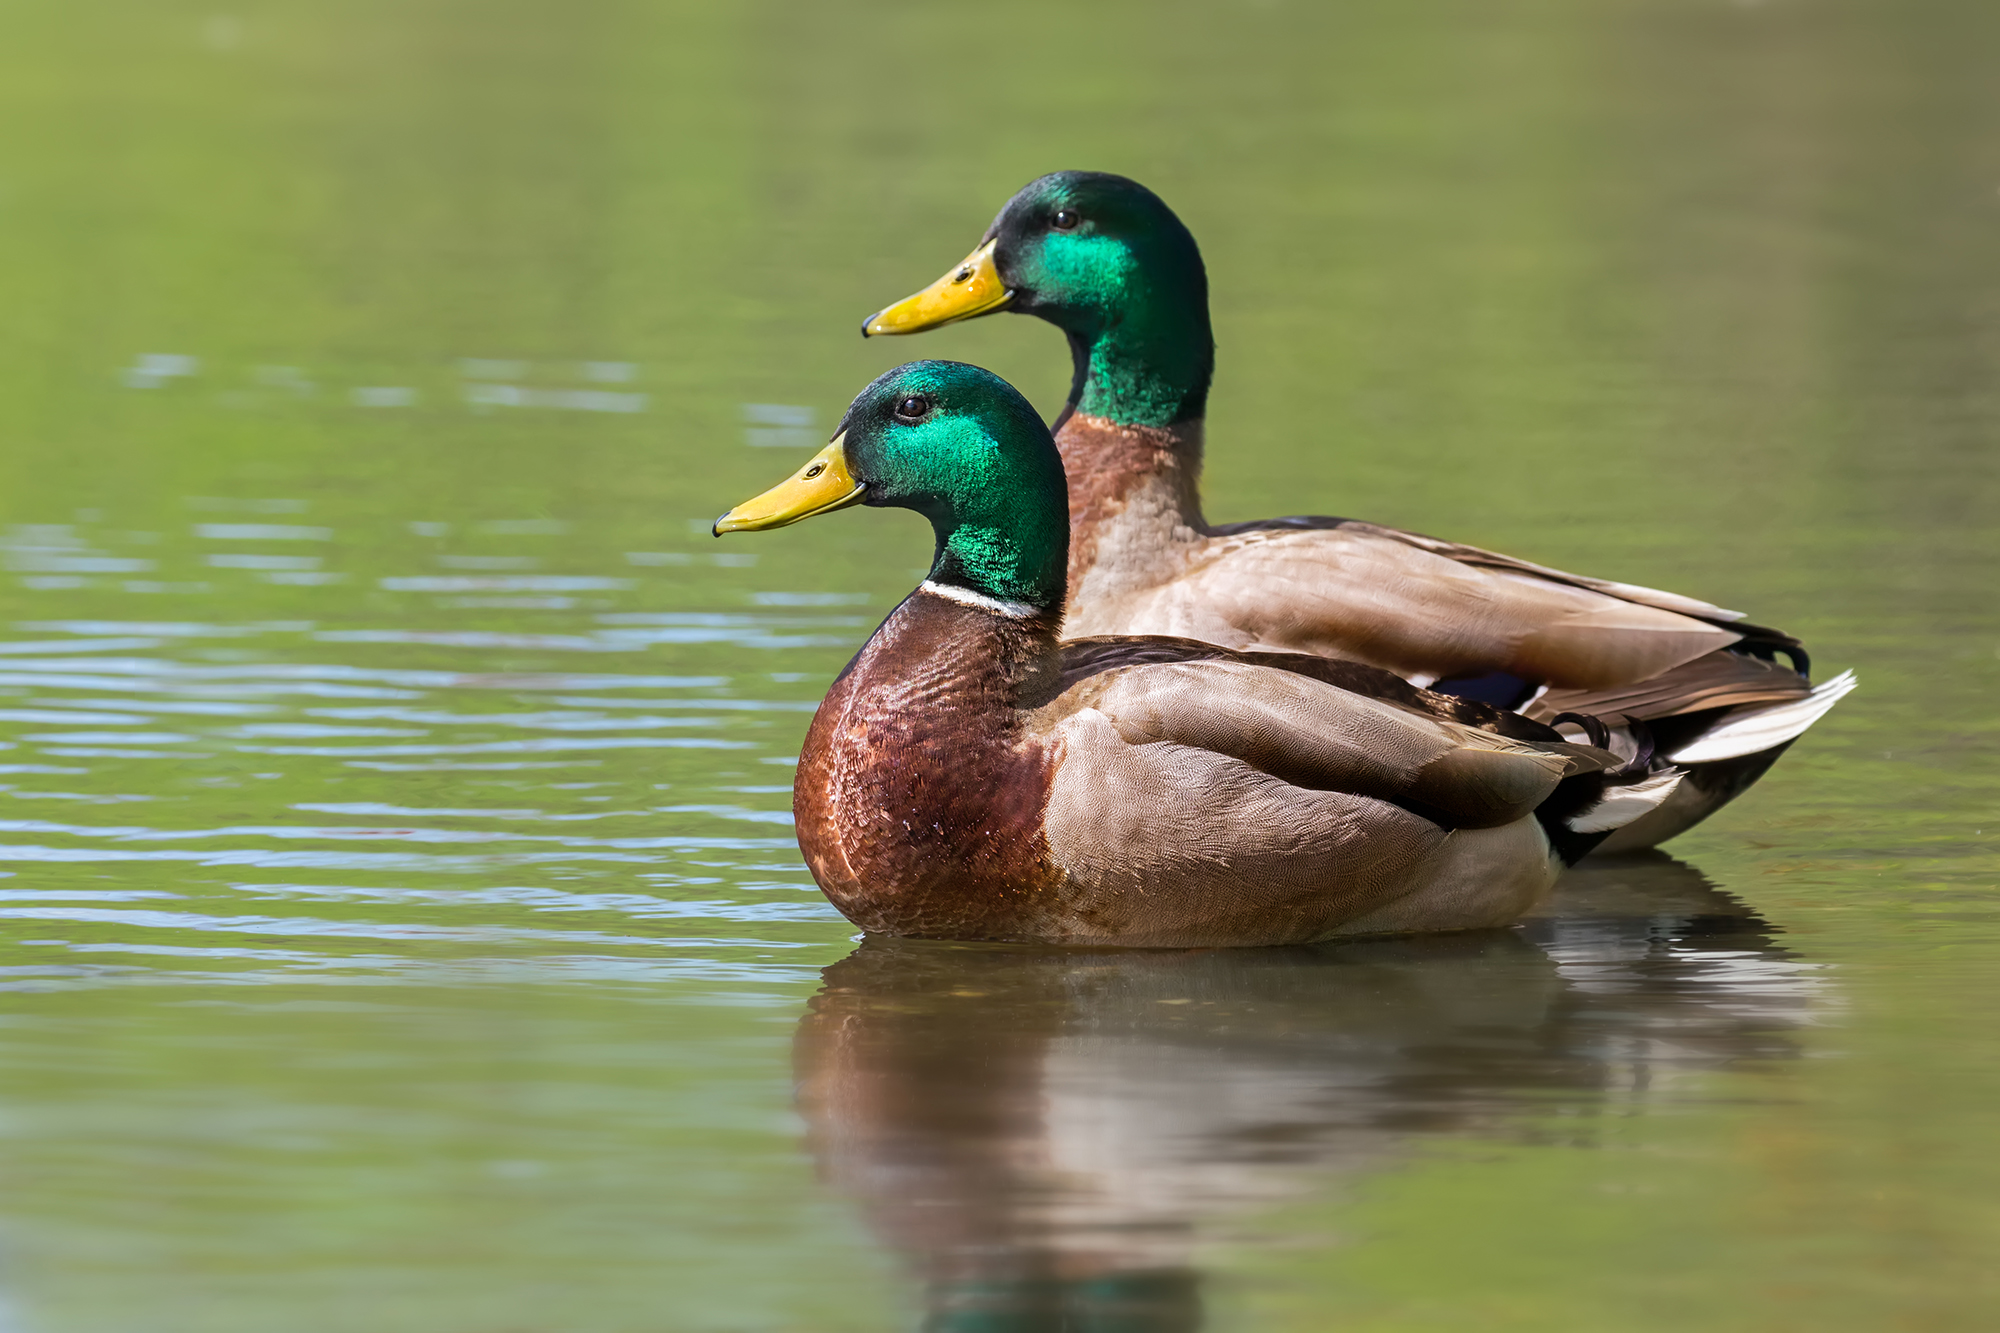

In [24]:
img

In [25]:
img_t = preprocess(img)

In [21]:
import torch

batch = torch.unsqueeze(img_t,0)
resnet.eval()
out = resnet(batch)

In [22]:
with open('imagenet1000_clsidx_to_labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]
    _,index = torch.max(out,1)
prob = torch.nn.functional.softmax(out,dim=1)[0]*100
labels[index[0]], prob[index[0]].item()

("10: 'brambling, Fringilla montifringilla',", 50.57444763183594)